In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings 
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

df = pd.read_json(r"C:\Users\hp\Desktop\M1\healthcare.json")
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [8]:
df.head(-1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,N/A,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [9]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,1.000000


In [10]:
df.describe(include=['object'])

,gender,ever_married,work_type,Residence_type,bmi,smoking_status
count,5110,5110,5110,5110,5110,5110
unique,3,2,5,2,419,4
top,Female,Yes,Private,Urban,N/A,never smoked
freq,2994,3353,2925,2596,201,1892


In [11]:
df['age'] = df['age'].astype('int64')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1


In [12]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,N/A,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
dd=df.copy()

In [14]:
dd.dropna(subset=['bmi'],axis=0,inplace=False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,N/A,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
df.bmi.fillna(df['bmi'].mean(), inplace=True)

TypeError: Could not convert 36.6N/A32.534.4242927.422.8N/A24.229.736.827.3N/A28.230.937.525.837.8N/A22.448.926.632.527.223.528.2N/A28.3N/A44.225.422.230.529.726.533.723.13229.923.928.526.4N/A20.233.6N/A38.633.739.2N/AN/A27.731.4N/A36.533.2N/A32.827.740.422.225.330.2N/A2447.520.33028.9N/A28.131.127.426.421.72724.1N/A45.944.1N/A22.929.7N/A29.127.332.341.125.629.826.337.526.229.432.324.431.427.72828.831.434.619.428.5N/A30.340.424.241.522.624.2N/A56.627.130.927.331.324312830.331.735.8N/A28.4N/A2429N/A36.520.136.5N/A26.738.729.934.92726.62523.821.836.83027.5N/A24.632.926.1N/A31.934.127.525.636.931.437.334.125N/AN/AN/A45.734.223.627.3N/A22.331.4N/AN/A26.432.9N/A37.14525.5N/A26.130.83229.9N/A37.431.734.527.929.5N/A4642.535.531.126.935.845.528.5N/A26.6N/A31.53230.831.13323.426.933.623.926.327.330.720.521.53127.140N/A28.628.128.442.225.831.93127.5N/A29.635.416.921.534.42826.839.331.732.628.435.921.234.542.440.536.730.929.3N/A19.61839.217.635.919.150.117.72732.354.6352239.426.142.43319.722.524.625.241.860.931.527.323.724.528.426.926.731.22525.427.5162731.625.130.924.823.429.418.32019.53627.727.528.526.833.629.128.534.925.135.326.431.540.143.136.729.321.231.221.427.934.33127.73638.727.625.116.522.835.424.334.340.125.721.938.426.130.525.954.729.918.627.124.925.219.42948.2N/A34.624.625.826.12927.220.73037.334.123.625.239.523.523.364.828.1N/A24.429.824.935.132.343.62147.316.637.524.231.621.63131.115.527.320.535.616.741.841.916.417.129.227.137.944.622.833.222.326.439.628.139.23637.840.341.517.721.241.623.823.724.83937.931.123.218.936.136.340.525.446.516.846.626.426.235.220.936.834.422.213.840.328.431.734.254.724.6N/A36.931.131.931.81828.529.52229.428.826.226.923.227.936.828.93129.415.337.130.538.223.230.245.221.824.41719.549.827.825.126.860.227.528.127.327.422.222.926.62332.622.1N/A22.5N/A25.531.4262031.631.221.724.22536.728.929.744.35139.734.73521.329.123.93641.227.133.225.430.734.819.231.735.737.829.735.823.639.740.521.440.824.7214526.2N/A28.341.61932.43439.428.731.831.220.932.13123.126.727.927.351.520.429.630.633.671.924.217.722.628.126.528.739.535.127.919.328.426.740.917.228.316.127.616.535.816.224.63235.319.240.430.724.326.434.731.735.622.82835.640.629.3212026.718.434.527.721.124.419.442.332.226.825.423.550.226.117.524.230.823.430.923.618.727.716.731.21729.819.729.127.222.32742.134.240.929.432.821.939.628.347.839.32827.131.223.120.834.130.135.834.629.826.730.229.754.623.335.62721.629.422.817.329.836.434.728.726.722.127.740.52325.322.1281228.429.636.222.855.724.326.925.335.318.3N/A2621N/A55.727.620.530.221.928.836.225.9N/A21.420.431.614.423.730.219.532.634.24342.219.741.721.624.219.225.823.220.828.430.223.116.739.533.834.62543.927.125.922.727.125.628.457.535.819.531.243.631.223.518.724.429.43729.438.523.5N/A16.335.935.920.332.327.922.331.829.727.124.528.9N/A24.631.632.341.13026.43020.84430.617.229.127.423.531.823.528.532.754.225.641.22721.334.329.531.626.127.526.533.240.232.523.432.523.929.52417.726.233.317.42921.737.841.824.231.123.125.141.322.72420.520.427.62726.434.93528.532.323.952.326.420.923.332.726.527.930.327.614.640.928.423.727.925.234.436.722.227.227.327.342.226.439.434.82034.131.417.846.128.124.722.734.621.427.436.632.924.721.433.126.724.425.834.318.143.826.936.624.927.620.930.337.435.950.331.524.438.928.6N/A27.5N/A43.72729.334.7N/A39.926.724.829.715.931.4N/A27.835.531.733.227.731.925.827.723.424.330.329.120.121.231.641.636.430.532.832.330.134.729.7N/A31.335.635.227.635.228.131.823.328.819.53025.528.840.232.922.436.919.812.332.424.816.435.9237830.526.835.327.922.138.341N/A22.830.120.831.730.130.842.637.134.243.418.73423.241.715.120.618.926.630.132.115.133.523.443.219.126.117.332.1N/A30.429.932.822.728.735.222.432.318.642.13822.333.423.21820.119.228.728.122.61821.427.827.632.224.927.124.624.618.916.331.82120.129.132.329.450.244.928.519.54522.825.531.531.63129.523.130.744.733.525.928.326.827.83622.138.430.126.226.632.62725.331.918.430.428.235.73527.2232524.530.92627.230.421.729.117.629.228.126.626.936.225.940.931.523.337.639.835.121.953.434.42429.32631.33126.51621.142.227.723.618.344.327.355.244.733.13040.123.130.330.522.84229.92436.722.225.534.31625.623.341.635.62226.831.919.7N/A31.134.433.2N/A21.625.441.633.121.83035.235.6N/A27.829.337.226.121.622.730.21827.823.541.222.729.242.22445.519.428.220.127.226.517.642.829.321.329.824.135.218.817.431.529.927.328.128.925.224.337.928.218.423.139.429.518.328.732.926.720.117.643.741.126.831.227.425.13330.742.914.333.24322.332.830.53626.520.1N/A28.116.23031.326.737.735.82720.722.2N/A41.533.521.822.130.238.732.141.320.122.124.92329.322.831.619.422.531.629.1N/A43.426.529.721.823.42321.514.628.52926.929.628.525.530.52322.831.435.223.3N/A31.224.825.848.443.1N/A27.821.422.131.820.129.122.625.133.315.920.819.53923.118.850.636.332.835.826.726.326.543.724.746.249.543.330.938.728.630.230.533.928.624.5N/A17.227.219.318.53244.53730.824.718.34427.645.428.517.6N/A27.532.829.536.426.135.3N/A18.127.1235526.6N/A24.130.332.226.530.625.841.929.244.329.117.531.932.22625.454.827.9N/A32.83425.535.628.336.922.131.526.724.932.432.230.328.724.125.324.8N/A34.839.224.728.627.733.127.320.333.9N/A28.332.419.733.735.52016.336.428.126.929.417.226.519.530.631.926.619.91826.725.331.421.117.927.537.624.118.13126.638.727.227.828.327.543.320.125.925.816.429.428.926.727.838.726.836.126.72721.22137.426.528.929.517.734.928.136.833.329.23433.928.721.138.227.735.827.120.535.615.64317.8N/A25.820.519.924.418.335.135.137.129.431.731.433.128.5241827.616.916.435.128.817.621.319.737.335.525.53021.945.5N/A34.919.332.126.932.519.531.721N/A20.3N/A21.540.4N/A30.140.234.725.923.734.334.326.322.133.337.320.519.134.716.32817.241.12527.521.515.129.630.234.930.736.521.533.250.222.3N/A27.328.331.924.932.726.424.830.725.43224.420.429.524.422.82036.332.834.430.529.736.934.237N/A47.524.230.652.838.632.842.925.924.735.8N/A31.226.130.840.525.228.7N/A30.415.236.634.523.735.738.94018.42920.628.266.826.234.834.530.655.118.829.122.128.934.720.325.118.225.534.448.525.232.542.119.527.725.129.632.955.925.124.717.520.823.322.826.625.525.825.457.3N/A20.227.723.114.323.323.422.830.928.441.934.325.110.331.831.82325.414.135.126.93322.120.8304416.628.426.339.415.734.129.823.618.328.318.518.424.125.525.339.928.837.2N/A49.834.329N/A37.2N/A19.426.221.1N/A31.629.328.435.340.13931.528.528.55628.635.232.535.925.116.827.916.3N/AN/A21.432.723.619.833.128.138.923.833.826.7N/A32.228.121.34421.537.344.821.432.335.419.731.335.525.832.835.941.827.327.713.4172040.938.530.933.417.128.6243228.420.333.843.222.729.9N/AN/A29.922.716.133.822.625.522.527.923.532.2N/A29.928.737.222.226.624.641.726.227.141.834.219.225.218.74328.234.725.539.820.828.231N/A21.626.2N/A2622.52431.536.325.432.239.818.630.716.420.528.72924.429.925.323.520.533.52229N/A30.737.451.816.629.527.327.533.927.922.932.118.230.231.320.323.230.822.942.822.228.732.324.223.934.22929.92317.32134.319.824.316.432.623.7N/A2725.63424.926.343.139.615.241.820.139.328.327.533.92034.820.724.639.4N/AN/A29.424.832.325.33929.431.926.420.626.323.61826.42230.529.124.936.431.232.831.635.835.22824.935.730.733.9N/A27.823.217.131.623.829.64525.627.725.518.32128.623.536.129.227.63620.419.929.227.938.124.137.829.135.7N/A34.534.121.157.722.220.526.223.529.139.821.2N/A20.230.833.817.121.3N/A22.328.926.74116.729.123.627.831.428.230.836.132.726.420.718.533.514.123.423.23635.621.834.920.42522.327.328.930.436.927.744.428.23520.626.525.122.227.327.341.938.818.319.517.220.823.824.723.122.429.92028.726.229.630.832.721.835.725.432.821.131.72034.72816.4N/A24.624.630.323.733.524.948.931.418.424.234.3N/A25.133.322.626.329.718.521.445.534.232.738.126.722.627.720.725.717.323.316.220.533.620.249.326.230.125.132.726.42124.120.430.939.127.729.530.3N/A37.830.224.225.222.217.729.632.228.719.538.520.621.543.81828.226.635.530.718.722.425.224.220.524.524.842.623.842.342.226.122.842.328.52332.849.823.831.734.95426.821.319.842.416.428.226.31723.356.125.135.336.330.443.926.428.342.33832.728.838.530.131.328.426.620.434.732.530.729.6N/A39.4N/A26.127.241.3N/A20.941.531.124.52324.719.3373133.126.627.740.319.526.726.138.221.397.640.927.320.929.217.93826.153.922.224.633.434.417.619.231.828.132.117.420.223.439.521.524.315.332.416.134.343.819.636.733.738.92823.916.642.917.127.230.333.92019.421.528.534.443.713.733.71827.921.835.823.130.3322530.724.311.530.733.726.517.6N/A22.518.522.425.337.339.72841.425.328.141.228.83128.323.944.227.635.737.427.523.425.8N/A22.819.53823.429.528.214.228.931.432.42226.426.137.618.823.849.423.820.440.323.634.332.728.724.524.823.22339.320.125.423.828.415.428.22641.532.225.7333527.416.431.529.225.932.3N/A30.445.125.936.618.627.531.337.523.1352729.823.548.531.82029.424.345.429.549.2N/A29.429.138.823.448.719.720.333.536.724.438.844.233.432.515.121.530.433.418.218.738.436.420.648.918.21731.83324.728.140.335.231.237.638.7N/AN/A28.129.231.124.118.739.615.753.832.442.718.631.433.724.533.735.4N/A22.533.629.7N/A25.720.222.717.422.223.828.733.12816.727.126.423.733.318.925.535.923.222.23420.434.531.919.82936.721.323.725.73430.744.827.723.230.129.329.525.826.228.829.826.527.82919.117.124.618.342.846.538.42626.821.1294336.627.540.237.13232.220.624.12525.227.648.827.639.527.226.328.93023.725.524.620.736.423.432.318.815.521.431.729.734.322.121.530.421.630.921.919.230.32324.152.727.623.926.923.940.53220.544.516.235.82433.93622.944.517.532.330.333.530.925.53032.221.724.728.8272627.118.518.831.518.124.328N/A17.317.226.922.425.821.34324.430.121.317.828.423.424.327.830.5N/A25.826.728.122.225.120.928.9N/A35.929.826.728.426.732.543.828.336.633.12723.6N/A21.823.528.731.631.925.225.932.528.127.421.226.818.5N/A30.619.9N/A26.543.831.836.622.918.729.643.6N/A20.321.339.252.830.235.33732.130.522.834.537.419.555.730.425.323.130.718.828.627.526.540.337.917.153.533.643.430.538.129.932.728.638.522.93843.820.826.825.5N/A25.426.750.521.334.717.936.318.434.533.419.425.624.53028.928.12333.534.817.621.12915.841.229.740.833.23724.534.52826.82123.829.324.422.622.829.732.435.831.131.933.725.619.945.315.528.340.224.324.626.630.923.523.934.234.926.236.222.419.341.74626.940.127.729.52622.71627.733.133.129.73433.32714.219.415.328.72128.920.32829.630.222.228.429.628.632.62930.131.220.745.114.837.419.91627.433.418.533.420.82232.519.232.923.521.729.1N/A30.329.430.132.93438.629.343.622.736.622.625.631.4262733.317.326.924.82035.836.929.631.125.151.936.328.235.830.922.117.629.52733.224.434.436.727.227.532.6N/A28.425.528.723.834.426.128.529.629.428.228.738.1N/A22.225.717.726.432.834.539.523.538.821.23263.332.625.227.4N/A38.632.92629.229.226.423.121.226.223.419.820.425.934.118.33526.427.627N/A31.31822.134.433.223.139.740.730.927.528.333.433.141.517.13024.932.526.119.238.729.528.114.133.92652.8N/A29.226.323.618.629.730.922.825.525.62320.6N/A28.429.72637.542.321.429.3312220.945.961.229.128.422.624.216.335.929.83735.821.137.624.831.917.5N/A17.638.915.227.427.916.13936.633.727.631N/A28.531.425.317.226.93222.517.32733.125N/A31.119.624.74838243024.623.117.443.127.114.346.82629.350.1N/A18.62725.725.527.324.142.741.220.230.927.722.339.434.220.136.8N/A33.927.722.732.22223.226.72323.424.131.526.123.720.818.832.524.324.132.539.323.92237.33324.732.829.824.121.627.12718.735.827.133.125.926.722.22623.523.515.924.926.535.7N/A32.128.540.126.621.728.83231.432.119.825.328.82630.743.335.220.935.32726.129.132.621.832.328.132.321.72528.921.745.340.222.521.326.128.8N/A32.420.425.938.830.824.620.638.840.4N/A36.218.827.628.339.433.540.425.927.644.730.822.327.922.927.32548.322.739.127.8N/A36.738.529.430.523.620.631.724.933.422.226.527.130.318.626.417.837.432.138.2N/A39.129.528.640.131.834.624.526.23322.3N/A58.136.943.918.223.132.641.228.62636.835.824.222.923.1N/A28.926.529.324.820.118.234.7242927.327.620.417.727.941.527.427.817.83237.328.129.122.938.82928.629.828.929.1N/A16.734.125.730.823.918.8N/A41.836.428.728.322.415.122.726.620.82335.829.943.436.340.135.932.420.333.222.318.128.229.7N/A2925.426.522.727.523.835.627.230.421.531.829.530.627.62324.82822.227.830.226.82234.329.230.3N/AN/A21.4N/A26.63033.730.931.12320.231.623.926.115.8N/A28.728.925.119.830.822.120.431.224.92720.124.422.622.426.222.932.631.343.941.8N/A37.720.821.622.139.236.73225.928.929.332.333.231.620.623.330.8N/AN/AN/A23.749.330.324.428.233.842.631.93419.830.521.724.638.119.230.123.334.530.843.829.950.422.619.533.424.252.725.626.935.222.134.42626.920.124.732.129.827.522.827.63333.725.115.322.221.42629.928.621.21622.725.331.638.927.124.131.53231.83423.429.317.231.931.623.23026.331.825.521.329.628.730.832.13416.932.122.631.32927.617.735.933.817.648.339.911.331.529.619.418.136.217.93320.433.634.53012.826.213.525.618.814.523.439.740.829.53325.633.128.149.316.935.932.134.115.14216.828.832.216.244.223.43128.723.635.739.527.331.333.429.22618.122.429.421.627.929.630.243.430.533.227.733.52831.52427.437.926.222.4N/A43.728.429.824.834.827.4N/A33.53524.428.329.131.332.829.131.914.226.322.824.834.121.526.121.433.52318.523.431.431.137.725.335.624.832.724.92622.82420.330.323.725.721.915.830.525.71928.8N/A22.432.436.627.927.7N/A34.326.71920.626.729.221.351.914.128.930.936.12528.620.516.736.626.433.127.526.923.926.927.832.728.722.626.528.324.32432.428.736.727.724.831.226.126.826.719.625.832.528.324.525.232.330.135.72023.523.422.328.720.929.427.643.928.734.737.124.222.729.32022.725.437.644.726.325N/A32.324.933.726.653.441.72220.342.728.232.522.526.5412725.923.7301521.525.924.339.214.426.630.735.429.226.721.519.125.43423.920.918.227.650.324.516.62418.83425.830.328.921.326.829.22521.517.132.526.930.429.820.341.1N/A33.93931.238.244.733.52731.129.226.617.924.219.528.521.341.331.340.836.626.718.715.226.825.131.359.729.833.524.533.639.747.426.43331.427.235.729.52126.624.343.9N/A52.52732.729.415.132.132.927.626.519.225.921.917.413.225.228.231.525.214.52815.131.426.3N/A39.628.931.434.32727.223.825.332.631.822.42823.925.316.426.925.418.737.541.437.515.837.630.522.119.23818.725.730.136.320.420.928.433.82443.336.437.932.623.918.136.429.230.823.817.931.819.531.524.1N/A35.931.61918.833.52552.924.824.540.420.231.925.415.438.63126.4N/A37.735.254.721.623.9N/A26.139.729.931.434.529.426.922.420.518.631.418.541.821.228.61630.62928.634.8N/A4230.330.932.119.632.831.5N/A34.721.527.628.621.123.833.533.423.32121.218.426.920.221.924.229.638.12229.82426.93816.923.438.521.615.925.141.121.52124.130.619.829.233.73121.519.121.424.835.128.635.745.434.521.222.739.121.916.52322.520.428.722.426.323.625.930.724.52420.13826.624.5N/A41.334.835.524.119N/A16.628.622.438.63240.13223.92528.519.825.72837.224.839.261.627.23836.216.63831.435.335.828.63415.531.137.537.724.233.43325.719.433.41840.126.922.527.623.335.728.429.431.925.135.621.117.831.526.644.831.317.225.328.849.91823.518.141.7N/A20.730.327.818.920.431.844.837.139.924.118.136.319.121.128.918.943.337.232.226.325.418.321.422.916.229.621.524.237.333.333.122.224.430.328.21753.830.422.325.3N/A29.843.834.525.531.539.247.31738.231.122.43224.736.320.227.429.654.328.643.922.228.423.718.318.328.9N/A27.113.821.924N/A20.839.826.243.927.3N/A224020.142.225.827.230.947.933.137.825.428.416.635.132.729.81327.523.636.916.726.53727.723.540.427.728.35528.72524.835.52517.337.832.828.728.828.424.929.626.129.523.925.836.231.326.119.117.621.42425.519.919.935.526.924.23030.926.530.619.123.230.515.816.91813.936.730.834.616.338.227.330.434.517.43233.440.230.146.235.629.427.317.426.917.723.627.73835.2N/A32.436.130.62922.327.317.43926.724.222.825.621.925.930.625.733.323.817.23124.727.1N/A38.350.929.223.633.516.330.831.126.418.637.326.617.622.320.230.931.529.732.532.825.427.231.639.619.829.625.525.832.125.626.339.425.63435.824.929.323.424.529.828.927.323.234.223.326.921.826.929.922.427.53527.925.528.634.850.630.914.831.422.319.127.417.536.225.425.728.633.737.928.42029.127.627.624.23134.52720.726.119.22823.657.23322.224.824.727.921.634.832.928N/A2524.727.334.239.122.733.918.616.720.620.145.225.332.434.943.72321.524.922.92521.346.164.43721.328.331.125.127.629.414.135.223.93427.129.5N/A20.739.533.723.230.128.8923827.743.224.128.734.823.528.520.34318.327.22250.835.455.927.919.82626.8N/A32.51514.21726.224.926.622.732.736.731.536.927.620.720.223.425.328.22724.834.817.327.816.2N/A21.721.429.336.228.323.525.927.121.530.523.437.62425.128.741.825.627.224.420.719.624.832.620.536.245.427.6N/A34.732.4N/A28.745.340.338.94632.419.427.526.231.134.624.334.628.532.12820.933.825.831.826.825.929.225.341.738.829.130.939.341.826.233.826.124.130.722.42330.230.328.736.316.334.520.83117.622.738.440.832.931.328.527.640.224.717.725.428.526.22645.331.520.629.457.939.123.838.119.535.526.422.229.141.922.633.321.320.428.728.838.732.337.925.327.725.116.827.728.637.632.722.71623.545.820.816.722.233.132.741.424.12824.223.52320.324.826.124.219.318.224.241.5283732.235.947.632.155.722.220.114.628.420.619.823.425.130.133.32427.821.425.5N/A21.818.921.930.629.828.735.529.132.822.831.3291924.121.42827.628.724.52529.629.935.627.942.621.228.525.6N/A31.130.422.931.948.84321.835.524.323.118.542.432.322.617.818.426.93223.431.422.428.927.457.228.423.528.338.233.333.328.832.128.925.525.919.523.824.918.530.616.132.527.430.223.53624.827.54018.118.823.629.743.727.320.223.821.425.117.934.527.126.143.433.237.241.335.426.124.5N/A32.729.220.433.51433.527.535.330.132.647.531.623.540.334.116.126.41934.723.332.62635.118.630.432.821.623.331.426.320.128.340.418.644.725.328.339.9N/A34.731.93532.730.627.920.429.623.546.427.425.225.833.327.728.933.138.127.917.427.122.728.321.53018.645.239.731.523.227.326.519.326.119.825.137.330.316.125.126.729.338.735.821.731.426.93324.544.925.522.124.332.4N/A33.126.737.939.619.83023.134.338.432.834.444.632.826.427.332.443.233.626.446.936.334.929.616.535.423.633.140.214.834.833.531.916.150.235.939.627.532.315.428.419.52526.339.638.633.932.225.137.430.12732.426.827.236.73637.219.121.826.53532.623.933.729.42920.2N/A27.42530.72326.618.147.129.719.913.332.731.831.420.433.230.530.334.234.448.122.830.535.933.724.125.425.529.2N/A17.429.921.524.725.134.427.931.531.830.126.427.222.529.826.124.923.530.137.325.535.327.628.729.934.224.936.824.534.63028.828.623.620.121.134.1N/A29.537.831.231.134.217.739.222.229.52716.823.333.515.628.222.620.222.222.626.722.921.530.314.824.317.42926.351.729.218.321.916.327.420.423.230.316.731N/A33.51719.414.632.237.727.42520.121.738.21728.43034.119.321.632.927.227.829.928.424.12423.432.633.133.830.336.929.738.830.936.918.825.532.325.831.127.918.620.126.730.330.43024.960.924.338.718.617.129.416.934.227.647.818.924.425.230.726.125.332.845.724.632.347.634.418.244.536.619.422.92036.127.342.226.423.618.61831.13043.823.836.232.61825.529.932.125.423.423.421.830.837.942.523.435.432.32746.330.134.718.316.233.218.625.124.133.124.823.454.128.938.137.219.62926.720.534.142.437.739.128.930.733.8N/A32.140.524.831.82713.723.416.414.938.838.632.2N/A30.628.135.221.828.128.228.437.421.819.816.233.621.228.4N/A41.124.956.628.833.738.633.822.437.323.439.121.231.22821.115.729.126.116.227.128.837.921.630.129.726.44626.123.228.420.524.632.230.5N/A24.926.534.521.515.917.726.524.426.623.930.123.618.432.124.427.334.828.440.231.12438.129.924.549.535.529.528.822.129.44527.128.320.131.317.624.524.131.331.529.930.227.815.626.324.817.120.318.728.828.724.625.329.7N/A21.126.926.226.324.82534.642.7N/A24.519.329.322.127.824.725.341.247.623.422.729.732.336.927.724.337.425.124.324.328.716.835.84024.325.637.8232115.517.12840.837.524.226.933.121.834.730.216.82130.938.9N/A24.317.428.240.817.5N/A28.324.521.746.918.6N/A4030.625.626.2 to numeric

In [16]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [17]:
pd.crosstab(df['work_type'],df['stroke'])

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


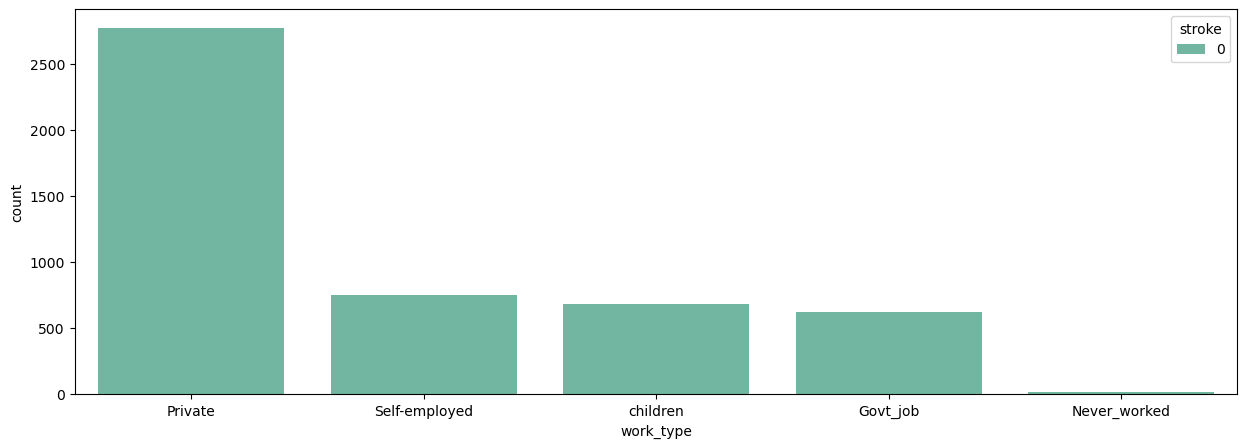

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la fréquence de chaque type de travail
work_type_counts = df[df['stroke'] == 0]['work_type'].value_counts()

# Obtenir les noms des types de travail triés par ordre décroissant
ordered_work_types = work_type_counts.index.tolist()

plt.figure(figsize=(15,5))
sns.countplot(x='work_type', hue='stroke', palette='Set2', 
              data=df[df['stroke'] == 0], order=ordered_work_types);


In [38]:
df_num = df[['age', 'avg_glucose_level', 'bmi']]

In [39]:
df_cat = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
                             'work_type', 'Residence_type', 'smoking_status']]

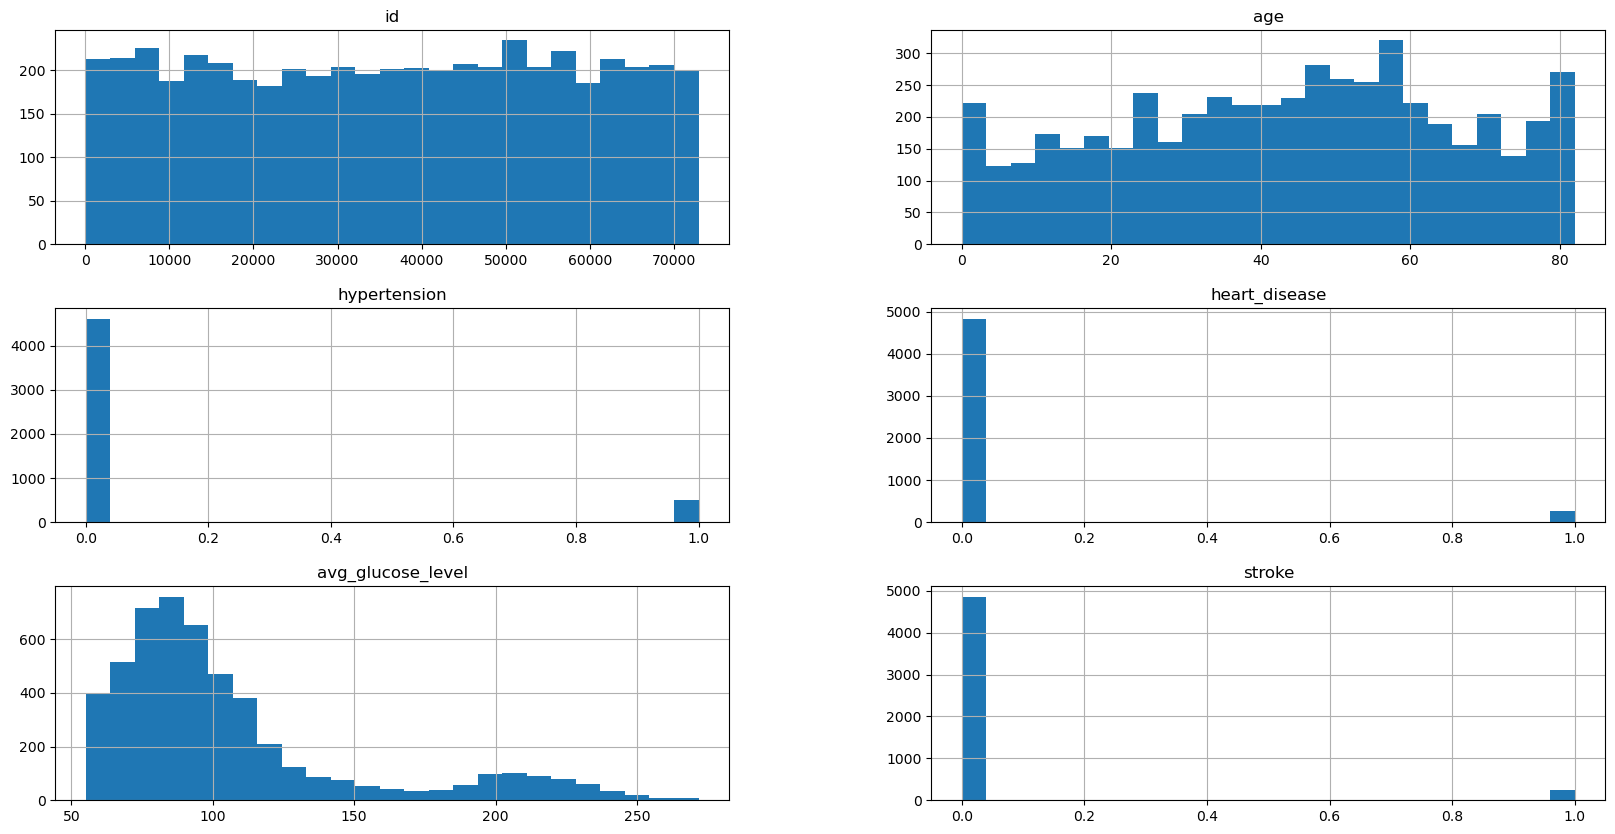

In [40]:
df.hist(bins=25, figsize=(20,10));



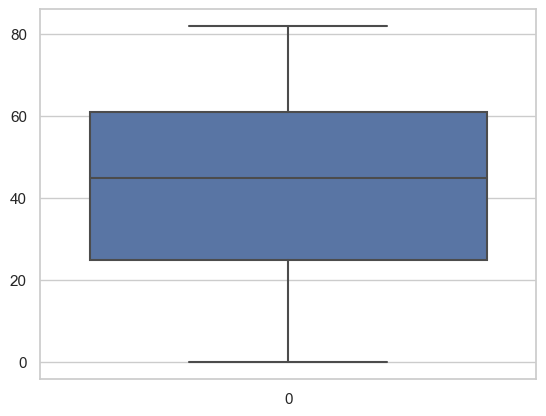

In [42]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=df['age'],orient='v')

IV.1 - traitement des valeurs aberrantes de la colonne 'bmi'

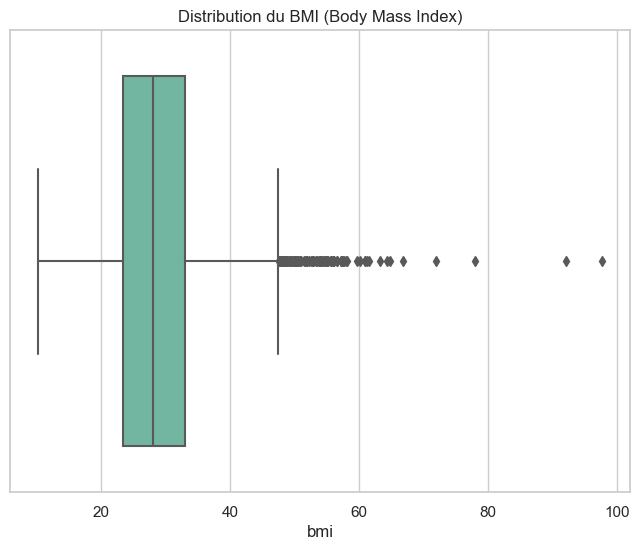

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la colonne 'bmi' en numérique si elle ne l'est pas déjà
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

# Supprimer les valeurs NaN après la conversion
df = df.dropna(subset=['bmi'])

# Définir le style de la grille pour le graphique
sns.set(style='whitegrid')

# Créer le graphique en boîte avec l'orientation horizontale
plt.figure(figsize=(8,6))
ax = sns.boxplot(x=df['bmi'], orient='h', palette='Set2')

# Ajouter un titre au graphique
ax.set_title('Distribution du BMI (Body Mass Index)')

# Afficher le graphique
plt.show()


In [45]:
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1
Inf = df['bmi'].quantile(0.25)-1.5*IQR
Sup = df['bmi'].quantile(0.75)+1.5*IQR

In [46]:
print(Sup)

47.5


In [47]:
df[df['bmi']>=Sup].count()

id                   113
gender               113
age                  113
hypertension         113
heart_disease        113
ever_married         113
work_type            113
Residence_type       113
avg_glucose_level    113
bmi                  113
smoking_status       113
stroke               113
dtype: int64

In [48]:
def drop_outliers(data,field_name):
    q1=data[field_name].quantile(0.25)
    q3=data[field_name].quantile(0.75)
    iqr=q3-q1
    inf = data[field_name].quantile(0.25)-1.5*iqr
    sup = data[field_name].quantile(0.75)+1.5*iqr
   
    data.drop(data[data[field_name]>sup].index,inplace=True)
    data.drop(data[data[field_name]<inf].index,inplace=True)
    

In [49]:
drop_outliers(df,'bmi')

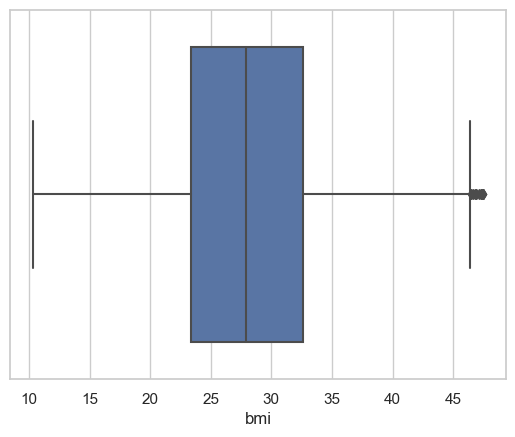

In [50]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['bmi'],orient='h')

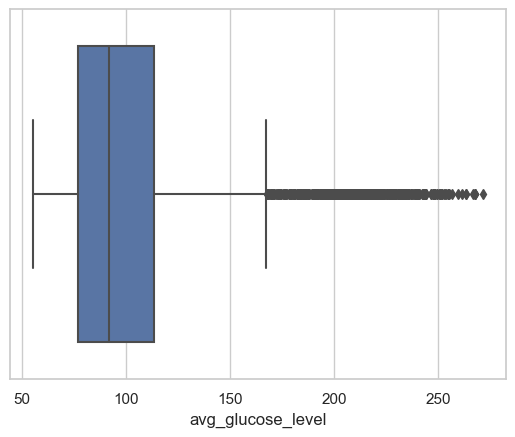

In [51]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['avg_glucose_level'],orient='h')

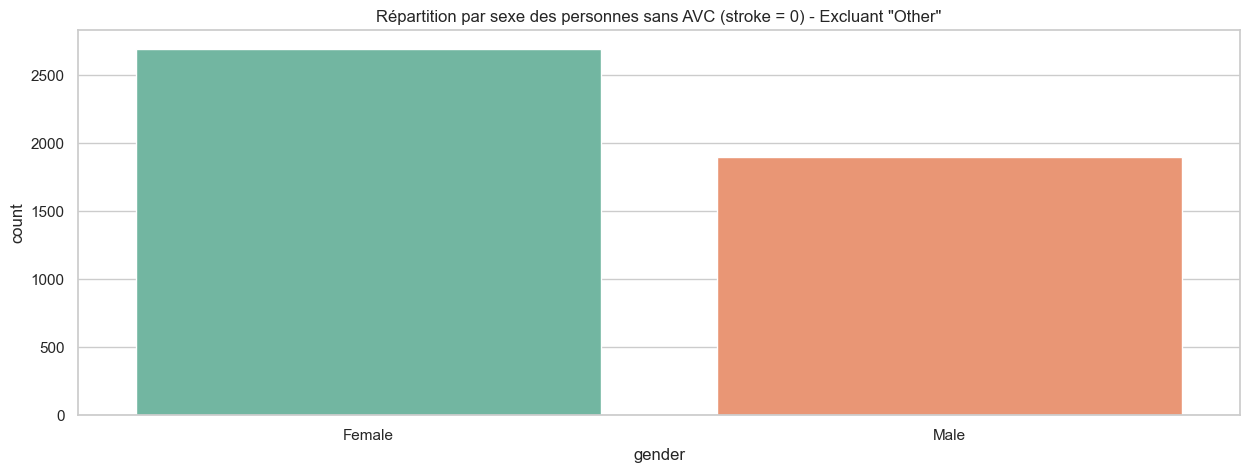

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer le DataFrame pour exclure la catégorie "Other"
filtered_df = df[(df['stroke'] == 0) & (df['gender'] != 'Other')]

plt.figure(figsize=(15, 5))
sns.countplot(data=filtered_df, x='gender', palette='Set2', order=['Female', 'Male'])
plt.title('Répartition par sexe des personnes sans AVC (stroke = 0) - Excluant "Other"')
plt.show()


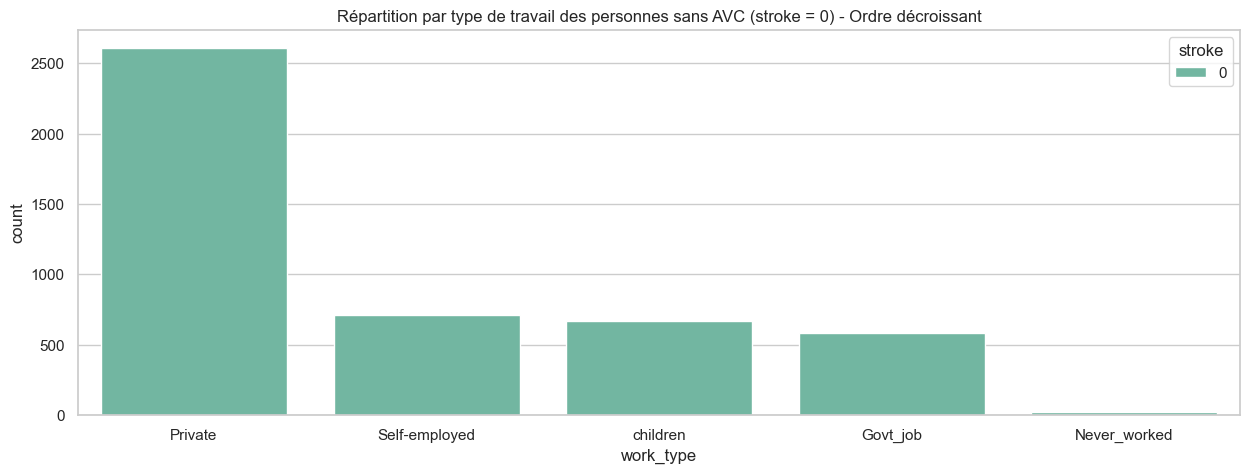

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer le DataFrame pour inclure uniquement les lignes où stroke est égal à 0
filtered_df = df[df['stroke'] == 0]

# Calculer les fréquences de chaque type de travail
work_type_counts = filtered_df['work_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(15, 5))
sns.countplot(x='work_type', hue='stroke', palette='Set2', data=filtered_df, order=work_type_counts.index)
plt.title('Répartition par type de travail des personnes sans AVC (stroke = 0) - Ordre décroissant')
plt.show()


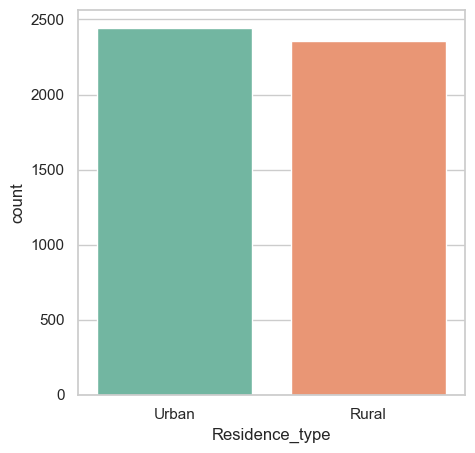

In [59]:
plt.figure(figsize=(5,5))
sns.countplot( x='Residence_type', palette='Set2', data=df);

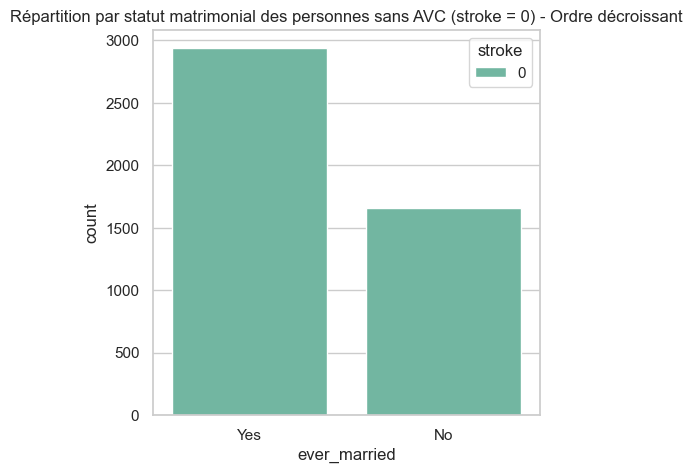

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer le DataFrame pour inclure uniquement les lignes où stroke est égal à 0
filtered_df = df[df['stroke'] == 0]

# Calculer les fréquences de chaque catégorie de statut matrimonial
ever_married_counts = filtered_df['ever_married'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(5, 5))
sns.countplot(x='ever_married', hue='stroke', palette='Set2', data=filtered_df, order=ever_married_counts.index)
plt.title('Répartition par statut matrimonial des personnes sans AVC (stroke = 0) - Ordre décroissant')
plt.show()


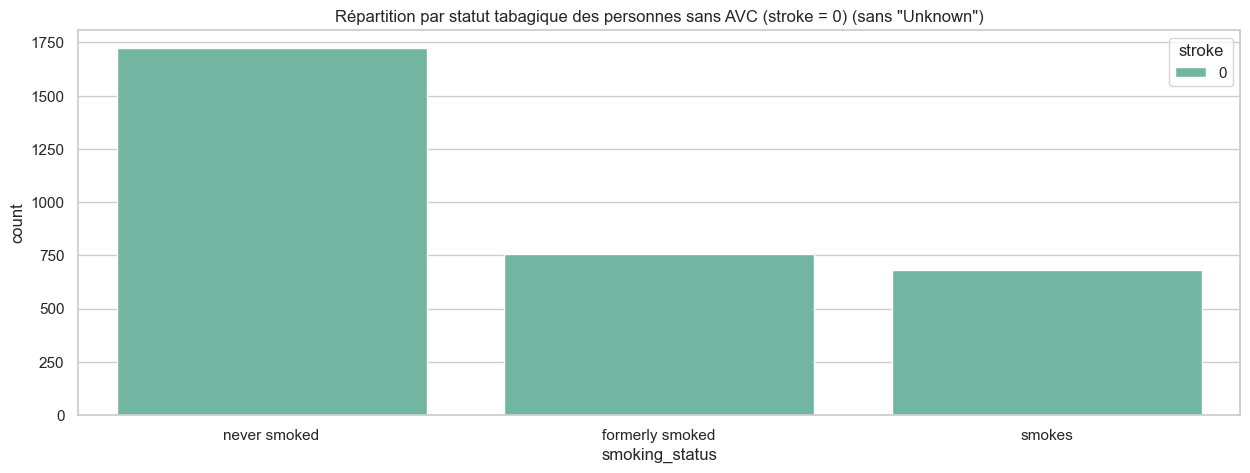

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer le DataFrame pour exclure les lignes où smoking_status est égal à "Unknown"
# et où stroke est égal à 0
filtered_df = df[(df['smoking_status'] != 'Unknown') & (df['stroke'] == 0)]

plt.figure(figsize=(15, 5))
sns.countplot(x='smoking_status', hue='stroke', palette='Set2', data=filtered_df, order=filtered_df['smoking_status'].value_counts().index)
plt.title('Répartition par statut tabagique des personnes sans AVC (stroke = 0) (sans "Unknown")')
plt.show()


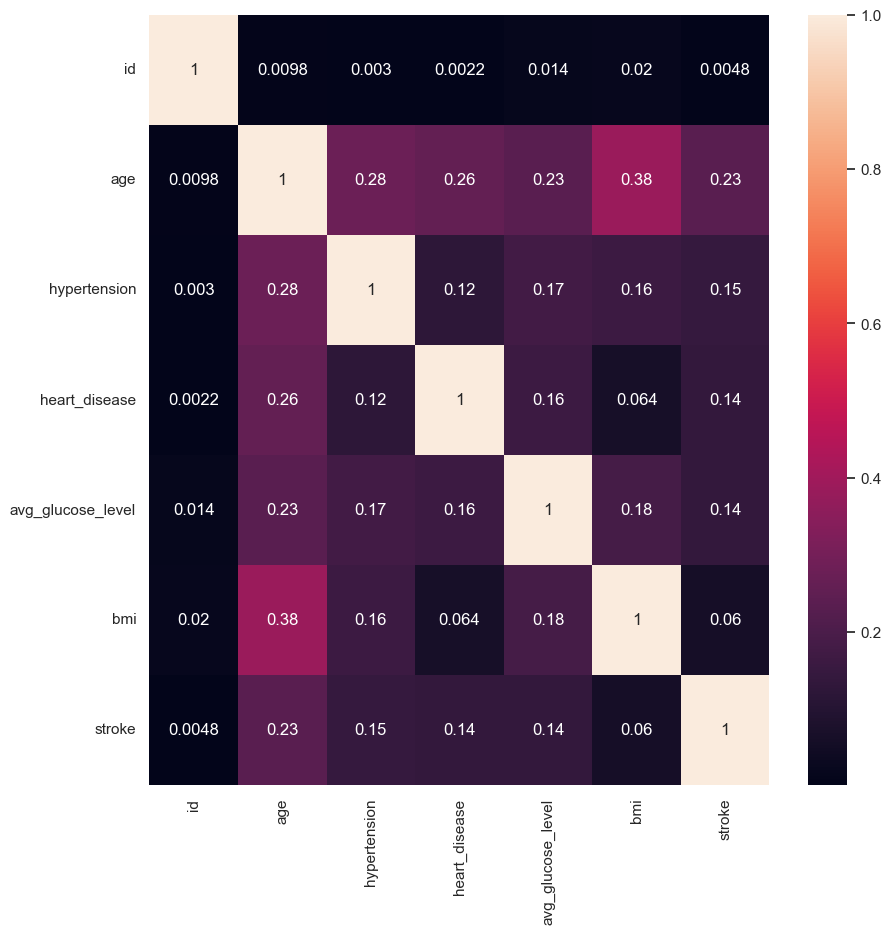

In [68]:
plt.figure(figsize=(10,10))
correlation = df.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

In [74]:
import streamlit as st
import pandas as pd
import seaborn as sns

# Charger le DataFrame
df = pd.read_json(r"C:\Users\hp\Desktop\M1\healthcare.json")

# Filtrer le DataFrame pour exclure les lignes où smoking_status est égal à "Unknown"
# et où stroke est égal à 0
filtered_df = df[(df['smoking_status'] != 'Unknown') & (df['stroke'] == 0)]

# Créer le premier graphique
st.subheader('Répartition par type de travail des personnes sans AVC (stroke = 0) (sans "Unknown")')
work_type_chart = sns.countplot(x='work_type', hue='stroke', palette='Set2', data=filtered_df, order=filtered_df['work_type'].value_counts().index)
st.pyplot(work_type_chart.figure)

# Créer le deuxième graphique
st.subheader('Répartition par statut matrimonial des personnes sans AVC (stroke = 0)')
married_chart = sns.countplot(x='ever_married', hue='stroke', palette='Set2', data=filtered_df)
st.pyplot(married_chart.figure)

# Créer le troisième graphique
st.subheader('Répartition par statut tabagique des personnes sans AVC (stroke = 0) (sans "Unknown")')
smoking_chart = sns.countplot(x='smoking_status', hue='stroke', palette='Set2', data=filtered_df, order=filtered_df['smoking_status'].value_counts().index)
st.pyplot(smoking_chart.figure)


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [87]:
cd C:\Users\hp\Desktop\M1


C:\Users\hp\Desktop\M1


In [90]:
pip install nbconvert


Note: you may need to restart the kernel to use updated packages.


In [92]:
cd C:\Users\hp\Desktop\M1


C:\Users\hp\Desktop\M1


In [93]:
jupyter nbconvert --to script app.ipynb


SyntaxError: invalid syntax (1998463072.py, line 1)